# **Ejercicio de clasificacion numerica**

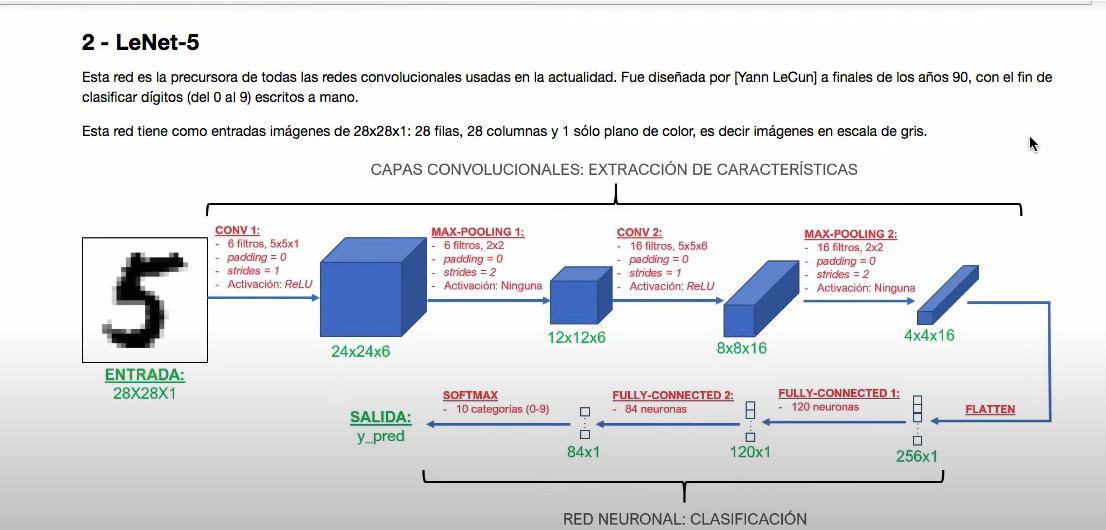


Tutorial blog: https://www.codificandobits.com/blog/tutorial-clasificacion-imagenes-redes-convolucionales-python/#el-set-de-datos

Tutorial video: https://www.youtube.com/watch?v=SGoxsBgp3WM

Conceptos de ML: https://docs.google.com/document/d/1zxvAPU5mxQZbiAvvjeyIrHD0aK6-F_N16y2Ndov6mXM/edit?usp=sharing

In [ ]:
!pip install keras

In [ ]:
!pip install tensorflow

Importamos las librerías

In [ ]:
import numpy as np
np.random.seed(2) #Se ajusta la semilla para tener reproducibilidad

import matplotlib.pyplot as plt
%matplotlib inline

Importamos mnist para usar el dataset de manera sencilla

Las ibrerias que se usaron en el tutorial original, por lo tanto actualizamos los import con las librerias correctas

In [ ]:
from keras.datasets import mnist
#from keras.utils import np_utils esta libreria fue actualizada, ahora se utiliza from tensorflow.keras.utils import to_categorical como reeplazo
from tensorflow.keras.utils import to_categorical

#from keras.models import Sequential
from tensorflow.keras.models import Sequential
#from keras.layers.convolutional import Conv2D, MaxPooling2D
#from keras.layers.core import Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
#from keras.optimizers import SGD
from tensorflow.keras.optimizers import SGD

**Pre-procesamiento del dataset**

mnist nos permite leer y crear automaticamente los sets de entrenamiento y validacion

Esta es una explicacion mas detallada de lo que vemos



*   Aquí, el conjunto de datos MNIST es cargado usando mnist.load_data().
*   x_train contiene las imágenes de entrenamiento (70,000 imágenes en total, 60,000 para entrenamiento y 10,000 para prueba).
*   Cada imagen es en escala de grises, con una resolución de 28x28 píxeles.
*   y_train contiene las etiquetas correspondientes a las imágenes de entrenamiento, es decir, los dígitos reales (0-9) que aparecen en las imágenes.
*   x_test y y_test son equivalentes para el conjunto de prueba (que contiene 10,000 imágenes para evaluar el modelo una vez entrenado).

Las lineas de print imprimen las siguientes informaciones
*   Estas líneas imprimen las dimensiones (o forma) de los datos cargados.
x_train.shape: Imprime las dimensiones de las imágenes de entrenamiento, que deberían ser (60000, 28, 28). Esto significa que hay 60,000 imágenes de 28x28 píxeles.
*   y_train.shape: Imprime las dimensiones de las etiquetas de entrenamiento, que deberían ser (60000,). Esto indica que hay 60,000 etiquetas, una por cada imagen de entrenamiento.
*   x_test.shape: Imprime las dimensiones de las imágenes de prueba, que deberían ser (10000, 28, 28), es decir, 10,000 imágenes de 28x28 píxeles.
*   y_test.shape: Imprime las dimensiones de las etiquetas de prueba, que deberían ser (10000,). Esto indica que hay 10,000 etiquetas correspondientes a las imágenes de prueba.

¿Qué representa cada conjunto de datos?
*   x_train y x_test: Son matrices tridimensionales que contienen las imágenes en formato 28x28 píxeles. El valor de cada píxel suele estar entre 0 (negro) y 255 (blanco).
*   y_train y y_test: Son vectores unidimensionales que contienen los números (dígitos) que corresponden a cada imagen.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#para saber el tamanho de x,y del dataset
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


En esta seccion agregamos preguntas que nos ayudaron a despejar dudas:

*¿Qué es MNIST y cómo saber lo que contiene?*

MNIST es un conjunto de datos de imágenes de dígitos escritos a mano, cada uno en formato de 28x28 píxeles. Contiene 60,000 imágenes de entrenamiento y 10,000 de prueba. El conjunto de datos es conocido, por lo que ya se sabe que contiene dígitos (del 0 al 9) escritos a mano.
Al trabajar con MNIST, es importante tener en cuenta que ya se sabe lo que contiene porque es un conjunto de datos estándar en el campo del aprendizaje automático.

*¿Es información que ya debía saber?*

Si estás empezando con machine learning, no es necesario que lo sepas de antemano. La documentación del conjunto de datos suele describir qué hay dentro de él. En este caso, como MNIST es ampliamente utilizado, la información sobre qué contiene es accesible.

*¿Qué es MNIST en términos de un conjunto de datos?*

MNIST es un ejemplo de un conjunto de datos preprocesado y estandarizado para enseñar y probar modelos de clasificación de imágenes. En este caso, es un conjunto de imágenes y etiquetas asociadas, donde cada imagen contiene un dígito y cada etiqueta corresponde al número representado en la imagen.

*¿Qué representan x_train e y_train?*

x_train es el conjunto de imágenes de entrenamiento: una matriz que contiene los píxeles de las imágenes (28x28 píxeles).
y_train es el conjunto de etiquetas de entrenamiento: un vector que contiene el dígito que corresponde a cada imagen en x_train.

*¿Qué hace x_train.shape?*

.shape no realiza ninguna acción sobre los datos, solo muestra la forma o dimensiones de la matriz. Por ejemplo, x_train.shape podría devolver (60000, 28, 28), indicando que hay 60,000 imágenes de 28x28 píxeles.
No establece el tamaño de las imágenes, simplemente te dice cuál es su forma (en este caso, 60,000 imágenes, cada una de 28x28 píxeles).

Se normalizan las imagenes para que tengan valores entre 1 y 0, no entre 0 y 255, esta accion se realiza para garantizar la convergencia del entrenamiento.

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

Codificamos a formato one-hot y_train e y_test

In [ ]:
nclases = 10
#y_train = np_utils.to_categorical(y_train,nclases)  por la actualizacion de la libreria
y_train = to_categorical(y_train,nclases)
#y_test = np_utils.to_categorical(y_test,nclases)  por la actualizacion de la libreria
y_test = to_categorical(y_test,nclases)

Visualizamos una imagen y una etiqueta del dataset con matplotlib

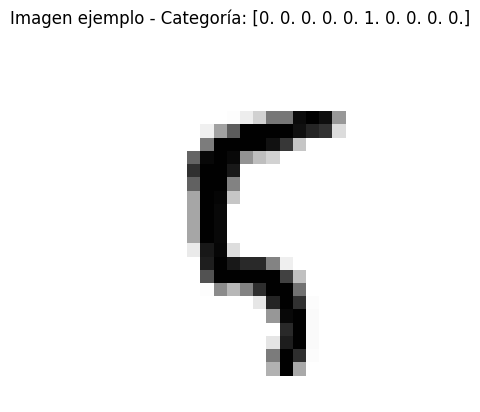

In [ ]:
nimagen = 100
plt.imshow(x_train[nimagen], cmap='gray_r')
plt.title('Imagen ejemplo - Categoría: ' + str(y_train[nimagen]))
plt.axis('off')
plt.show()

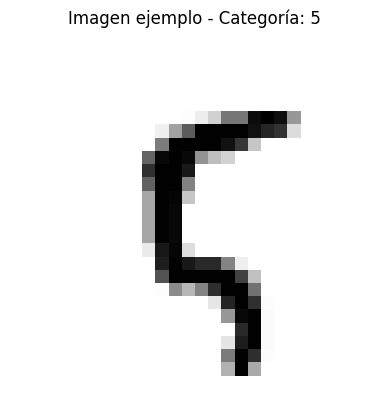

In [ ]:
nimagen = 100
plt.imshow(x_train[nimagen,:].reshape(28,28), cmap='gray_r')
plt.title('Imagen ejemplo - Categoría: ' + str(np.argmax(y_train[nimagen])))
plt.axis('off')
plt.show()

Finalmente, debemos reajustar las imágenes de entrenamiento y validación, para indicar explícitamente a Keras que cada imagen tendrá un solo canal de información (por tratarse de imágenes en escala de gris). Para esto usamos la función reshape de Numpy:

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

# Creacion del modelo

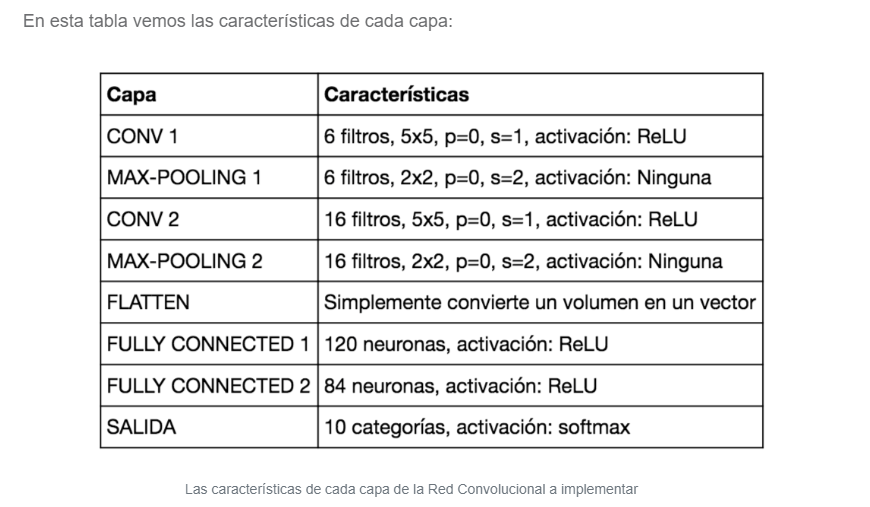

Primeramente creamos el contenedor del modelo con Sequential, que es donde vamos a ir anhadiendo las capas de la CNN

In [ ]:
modelo = Sequential()

Se anhade la primera capa convolucional que tiene 6 filtros, cada uno de 5x5, sin padding y con stride igual a 1 y función de activación ReLU. Debemos igualmente definir de forma explícita el tamaño de cada imagen de entrada (28x28x1):

In [ ]:
# CONV1 Y MAX-POOLING1
modelo.add(Conv2D(filters=6, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
modelo.add(MaxPooling2D(pool_size=(2,2)))

#CONV 2 MAX-POOLING2
modelo.add(Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2,2)))

# Aplanar, FC1, FC2 y salida
modelo.add(Flatten())
modelo.add(Dense(120,activation='relu')) #120 neuronas en la primera capa
modelo.add(Dense(84,activation='relu')) #84 neuronas en la segunda capa
modelo.add(Dense(nclases,activation='softmax')) #salida de softmax con 10 clases en la capa de salida

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


En #CONV 2 MAX-POOLING2 no agregamos el tamanho de la imagen porque la libreria ya toma como tamanho de entrada, el tamanho de salida de la capa anterior



**Compilacion del modelo**

En este paso definimos el optimizador, es decir el método que se usará para actualizar los coeficientes de los filtros y de la Red Neuronal durante el entrenamiento.

En nuestro caso usaremos el método del Gradiente Descendente, y fijaremos una tasa de aprendizaje de 0.1:

In [ ]:
sgd = SGD(learning_rate=0.1)
modelo.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

Definimos como realizaremos el entrenamiento donde utilizamos:



*   10 epocas/iteraciones
*   Una tasa de aprendizaje de 0.1
*   Un tamanho de lote(batch_size) de 128

Del tutorial:
Para el entrenamiento usamos la función fit y podemos usar la palabra clave validation_data para que durante el mismo entrenamiento Keras evalúe la precisión que se logra con el set de validación. De todos modos es importante tener en cuenta que este set de validación se usa sólo para medir el desempeño del modelo, pero no para entrenarlo ni para aprender los coeficientes (para ello se usa el set de entrenamiento):

In [ ]:
nepochs = 10
tam_lote = 128
modelo.fit(x_train, y_train, epochs=nepochs, batch_size=tam_lote, verbose=1, validation_data=(x_test,y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 55s 115ms/step - accuracy: 0.6714 - loss: 0.9648 - val_accuracy: 0.9666 - val_loss: 0.1039
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 133ms/step - accuracy: 0.9644 - loss: 0.1133 - val_accuracy: 0.9706 - val_loss: 0.0870
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 75s 119ms/step - accuracy: 0.9760 - loss: 0.0776 - val_accuracy: 0.9634 - val_loss: 0.1124
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 90s 136ms/step - accuracy: 0.9814 - loss: 0.0609 - val_accuracy: 0.9775 - val_loss: 0.0733
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 72s 116ms/step - accuracy: 0.9835 - loss: 0.0514 - val_accuracy: 0.9843 - val_loss: 0.0487
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 105ms/step - accuracy: 0.9871 - loss: 0.0398 - val_accuracy: 0.9816 - val_loss: 0.0590
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 100s 143ms/step - accuracy: 0.9891 - loss: 0.0344 - val_accuracy: 0.9846 - val_loss: 0.0458
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 134ms/step - accuracy: 0.9907 - loss: 

# Analizar el desempenho del modelo

**Matriz de confusion**

Nos ayuda a analizar de manera mas detallada el desempenho del modelo, como por ejemplo si algunos digitos son clasificados con mayor precision que otros

Como tenemos 10 categorias tenemos una matriz 10x10

*  Las filas representan las categorias a las que realmente pertenecen las imagenes
*  Las columnas representan a la prediccion que realiza el modelo

La predicción realizada por el modelo la obtenemos usando la función *predict_classes*, mientras que la categoría real corresponde al vector *y_test* cargado inicialmente:

# OBS: funcion de Matriz de confusion

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def graficar_matriz_de_confusion(y_ref, y_pred, clases, cmap=plt.cm.Blues):

    titulo = 'Matriz de confusión'

    cm = confusion_matrix(y_ref, y_pred)

    # Generar figura
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=clases, yticklabels=clases,
           title=titulo,
           ylabel='Categoría real',
           xlabel='Predicción')

    # Rotar y alinear ticks
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Rellenar gráfica con los valores de la matriz de confusión
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

**Llama a la funcion de grafico de la matriz de confusion**

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


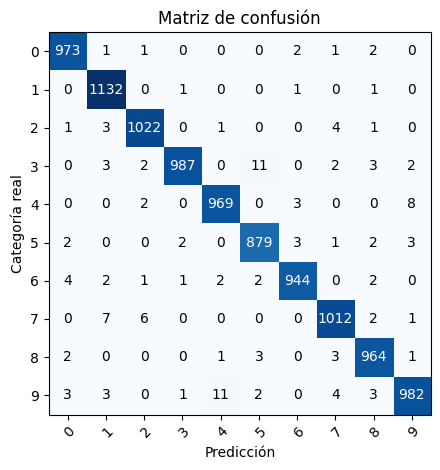

In [ ]:
#from matriz_confusion import graficar_matriz_de_confusion
# Realiza predicciones en el conjunto de prueba
y_pred_prob = modelo.predict(x_test)

# Convierte las probabilidades a clases
y_pred = np.argmax(y_pred_prob, axis=1)

# Convierte las etiquetas verdaderas si no lo has hecho
y_ref = np.argmax(y_test, axis=1)

# Define las etiquetas para las clases
etiquetas = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Llama a la función para graficar la matriz de confusión
graficar_matriz_de_confusion(y_ref, y_pred, etiquetas)


Explicacion del tutorial sobre como interpretar la matriz de confusion:

¿Y cómo se interpreta esta matriz de confusión? Si tuviéramos un clasificador ideal (precisión del 100%), todos los números diferentes de cero deberían estar en la diagonal principal.

Sin embargo, vemos que a pesar de que la precisión es muy alta, el clasificador no es ideal (¡en realidad ningún clasificador lo es!).

Veamos dos casos extremos: ¿para cuál de los dígitos se logra la peor precisión y para cual la mejor durante la clasificación?

La precisión más baja se obtiene con el número 5. En la matriz de confusión vemos que fue clasificado correctamente 875 veces. Pero este mismo dígito fue clasificado incorrectamente como el número 3 un total de 13 veces, y que una vez fue clasificado incorrectamente como 0, 6, 7 u 8. Esto quiere decir que para este dígito en particular se alcanza una precisión del 98%.

Por otra parte, la precisión más alta se obtiene con el número 3, que fue clasificado correctamente 1007 veces, e incorrectamente tan solo 3, lo que nos da una precisión del 99.7%.

Act
